# Assignment 2 - Supervised Machine Learning Fundamentals

## Sydney Donati-Leach
Netid: sd464

*Names of students you worked with on this assignment*: Mohammad Anas, Emma Mavis, Aarushi Verma

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. The performance would generally be __worse__. A flexible model will yield a higher test MSE than an inflexible model because it will overfit to the multitude of "patterns" in the large amount of data.

2. The performance would generally be __better__. A flexible model will yield a lower test MSE than an inflexible model because it can optimize each parameter to perform best on unseen data.

3. The performance would generally be __better__. A flexible model will yield a lower test MSE than an inflexible model because it better represents this relationship than an inflexible linear model for example.

4. The performance would generally be __worse__. A flexible model will yield a higher test MSE than an inflexible model because it will overfit to the variance of these error terms and will not fit well to unseen data.

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


(a) 
- (i) This is a __regression__ problem because the target variable is salary which is a continuous numerical variable.
- (ii) We are most interested in __inference__  because this is trying to understand the world as it currently is rather than what it could be.
- (iii) __n=500__ and __p=3__ (profit, number of employees and industry).

(b) 
- (i) This is a __classification__ problem because there is a binary response of success or failure and we need each new product to fall into one of those two categories.
- (ii) We are most interested in __prediction__ because this is for new products which we cannot yet observe.
- (iii) __n=20__ and __p=13__ (price charged for the product, marketing budget, competition price, and ten other variables).

(c) 
- (i) This is a __regression__ problem because the target variable is percent change of the US dollar which is a continuous numerical variable. 
- (ii) We are most interested in __prediction__ because this is dependent on the future value of the US dollar which we cannot yet observe.
- (iii) __n=52__ and __p=3__ (percent change in the US market, the percent change in the British market, and the percent change in the German market).

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [3]:
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

# convert the numpy array to a pandas dataframe
df=pd.DataFrame(X)
# manually assign column headers
df=df.rename(columns={ 0: "x1", 1: "x2", 2: "x3"})
# add a column of labels (y)
df['y']= y
# manually assign row headers
df['Obs']=[1,2,3,4,5,6]

df=df.set_index('Obs')
df

,x1,x2,x3,y
Obs,,,,
1,0,3,0,r
2,2,0,0,r
3,0,1,3,r
4,0,1,2,b
5,-1,0,1,b
6,1,1,1,r


**ANSWER**:

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

In [4]:
test_point = (0,0,0)
obs = []
# iterate through the rows (i) of the dataframe
for i in X:
    # calculate the distance between the test point and the current row
    obs.append(distance.euclidean(test_point,i))
# add the distances to the dataframe
df['euclidean']= obs
df

,x1,x2,x3,y,euclidean
Obs,,,,,
1,0,3,0,r,3.000000
2,2,0,0,r,2.000000
3,0,1,3,r,3.162278
4,0,1,2,b,2.236068
5,-1,0,1,b,1.414214
6,1,1,1,r,1.732051


**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

In [5]:
# identify which point has the smallest distance
min_dist = min(df['euclidean'])
# identify the label of the point with the smallest distance
y_hat = df[df['euclidean']==min_dist]['y'].values[0]

print("Our prediction when K=1 for the test point of (0,0,0) is {}.".format(y_hat))

Our prediction when K=1 for the test point of (0,0,0) is b.


With $K=1$, we look for 1-nearest neighbor to the test point. The easiest way to find that nearest neighbor is to grab the smallest/minimum euclidean distance. In this case, it is point 5 which has a qualitative response variable of "Blue". Therefore, our prediction when $K=1$ for the test point (0,0,0) is __Blue__.

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

In [6]:
# sort the distances from smallest to largest
sort_dist = (df['euclidean'].sort_values(ascending=True))

y_hat = [] # Variable to store the estimated class labels 
# iterate through the 3 smallest points (i)
for i in sort_dist[0:3]:
    # append the labels of those 3 points
    y_hat.append(df[df['euclidean']==i]['y'].values[0])
    # find the most common label
    y_hat_max = max(set(y_hat), key = y_hat.count)
print("Our prediction when K=3 for the test point of (0,0,0) is {}.".format(y_hat_max))

Our prediction when K=3 for the test point of (0,0,0) is r.


With $K=3$, we look for 3 nearest neighbors to the test point. The easiest way to find those nearest neighbors is to sort the euclidean distances in ascending order and grab the first three values. In this case, it is points 2, 5 and 6 which have a qualitative response variable of "Red", "Blue", and "Red" respectively.  Out of these three targets, the majority is red; therefore, our prediction when $K=1$ for the test point (0,0,0) is __Red__.

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

A highly non-linear Bayes decision boundary signifies that we need a flexible model capable of adjusting to non-linear variance. Therefore, __K should be small__ because this increases the flexibility of the model as well as the variance.  Of course, we will also see the bias variance tradeoff come into play here.  A lower value of $K$ means higher variance, which will naturally lead to lower bias and the potential for overfitting.

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors.

In [7]:
class Knn:
    """k-Nearest Neighbor class object for classification training and testing."""
    def __init__(self):
        # Initialize the class 
        self.x_train = []
        self.y_train = []

    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x_train = x
        self.y_train = y
        
    def predict(self, x, k):
        
        # create a matrix of size n x n, where n is the number of training points
        m = np.ones([len(x), len(self.x_train)])
        # iterate through the rows (i) of the test data
        for i in range(len(x)):
            # iterate through the columns (j) of the training data
            for j in range(len(self.x_train)):
                # Calculate the distance from each point in x to each point 
                # in the training data
                # store the distance in the matrix
                m[i,j] = distance.euclidean(x[i], self.x_train[j])

        
        y_hat = [] # Variable to store the estimated class labels
        # iterate through the rows (i) of the matrix
        for i in range(m.shape[0]):
            # Sort the distances and grab the first k values
            min_dist = np.argpartition(m[i], k)[:k]
            pred = [] # Variable to store k predicted class labels
            # iterate through the k smallest distances (j)
            for j in range(len(min_dist)):
                pred.append(self.y_train[min_dist[j]][0])
            y_hat.append((max(set(pred), key = pred.count)))
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
def accuracy(y_test,y_hat):
    nvalues = len(y_test)
    accuracy = sum(y_test[:,0] == y_hat) / nvalues
    return accuracy

The Knn predict function above has two main sections/chunks of code.  The first chunk of code gets all of our distances into a matrix of size (1000, 1000) in the case of these datasets.  This is because each dataset has 1000 observations, so we get the euclidean distance of each test point to each training point.  When that distance is calculated, the value is stored in the matrix we created.

The second chunk of code works out the logic behind our value of k. For example, if k = 5, we would only want to grab the labels of the 5 closest training points.  But first, we need to sort those distances in the matrix from smallest to largest for each row.  Then we can identify the labels associated with the 5 smallest training points, and determine which label occurs the most often out of those 5.  Our output will be a list of 1000 labels, otherwise known as our prediction ($\hat{y}$) for our test points.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

In [8]:
x_train_low = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_X_train_low.csv", header=None).values
y_train_low = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_y_train_low.csv", header=None).values

x_test_low = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_X_test_low.csv", header=None).values
y_test_low = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_y_test_low.csv", header=None).values


x_train_high = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_X_train_high.csv", header=None).values
y_train_high = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_y_train_high.csv", header=None).values

x_test_high = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_X_test_high.csv", header=None).values
y_test_high = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/"
"Assignments/CourseGitHub/assignments/data/A2_y_test_high.csv", header=None).values

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

First, we will train the classifier on the low dimensional dataset, which has 2 features.

In [9]:
start=time.time()

# initialize the classifier
low = Knn()
# fit the training data to the classifier
low.fit(x_train_low, y_train_low)
# predict the class labels for the test data
y_hat_low = low.predict(x_test_low, 5)

end=time.time()

time_low = end-start
print("Time [sec] to classify low dimensional dataset:",round(time_low,4))

Time [sec] to classify low dimensional dataset: 5.9781


In [10]:
# calculate the accuracy of the predictions
score_low = accuracy(y_test_low, y_hat_low)

print("Accuracy of low dimensional test data:",round(score_low*100,2),"%")

Accuracy of low dimensional test data: 92.5 %


Now repeat the process for the high dimensional dataset, which has 100 features.

In [11]:
start=time.time()

# initialize the classifier
high = Knn()
# fit the training data to the classifier
high.fit(x_train_high, y_train_high)
# predict the class labels for the test data
y_hat_high = high.predict(x_test_high, 5)

end=time.time()

time_high = end-start
print("Time [sec] to classify high dimensional dataset:",round(time_high,4))

Time [sec] to classify high dimensional dataset: 6.4988


In [12]:
# calculate the accuracy of the predictions
score_high = accuracy(y_test_high, y_hat_high)

print("Accuracy of high dimensional test data:",round(score_high*100,2),"%")

Accuracy of high dimensional test data: 99.3 %


In [13]:
print("The higher dimensional test data has a higher accuracy"
" than the lower dimensional test data, and it only requires"
" {0:.3f} more time [sec] to make these predictions.".format(time_high-time_low))

The higher dimensional test data has a higher accuracy than the lower dimensional test data, and it only requires 0.521 more time [sec] to make these predictions.


**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

In [14]:
# initialize the sklearn Knn classifier for the low dimensional data
model_knn_low = KNeighborsClassifier(n_neighbors=5)

start=time.time()
# fit the training data to the classifier
model_knn_low.fit(x_train_low, y_train_low)
# predict the class labels for the test data
pred_test_low = model_knn_low.predict(x_test_low)
# calculate the accuracy of the predictions
sk_score_low = accuracy_score(y_test_low, pred_test_low)

end=time.time()

sk_time_low = end-start
print("Time [sec] to classify low dimensional dataset in sklearn: {0:.3f}"
.format(sk_time_low))
print("Accuracy of low dimensional test data in sklearn: {0:.1f}%"
.format(sk_score_low*100))

Time [sec] to classify low dimensional dataset in sklearn: 0.039
Accuracy of low dimensional test data in sklearn: 92.5%


In [15]:
# initialize the sklearn Knn classifier for the high dimensional data
model_knn_high = KNeighborsClassifier(n_neighbors=5)

start=time.time()
# fit the training data to the classifier
model_knn_high.fit(x_train_high, y_train_high)
# predict the class labels for the test data
pred_test_high = model_knn_high.predict(x_test_high)
# calculate the accuracy of the predictions
sk_score_high = accuracy_score(y_test_high, pred_test_high)

end=time.time()

sk_time_high = end-start
print("Time [sec] to classify high dimensional dataset in sklearn: {0:.3f}"
.format(sk_time_high))
print("Accuracy of high dimensional test data in sklearn: {0:.1f}%"
.format(sk_score_high*100))

Time [sec] to classify high dimensional dataset in sklearn: 0.045
Accuracy of high dimensional test data in sklearn: 99.3%


In [16]:
print("For low dimensional data, the sklearn classifier is {0:.3f}"
" seconds faster than my classifier.".format(time_low-sk_time_low))
print("For high dimensional data, the sklearn classifier is {0:.3f}"
" seconds faster than my classifier.".format(time_high-sk_time_high))

For low dimensional data, the sklearn classifier is 5.939 seconds faster than my classifier.
For high dimensional data, the sklearn classifier is 6.454 seconds faster than my classifier.


__The accuracy scores for my classifier and the sklearn classifier are the same for both the high and low dimensional datasets.__

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

When the prediction process is slow, we are sometimes risking life or death.  A great example of when slow testing might be more problematic than slow training is with self-driving vehicles.  If the car has been trained appropriately, it should have been given millions of images of a car or a child or a red light and classified them accurately.  This was most likely a long and slow process.  However, this is necessary so that when the car is on the road, it is able to classify objects at lightning speed.  In the worst case scenario, if the prediction process is too slow, it could result in injury or death.

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

In [17]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

**ANSWER**

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

In [18]:
# Create a synthetic dataset (with both features and targets)
raw_data = datasets.make_moons(n_samples=1000, noise=0.35)
X, y = raw_data

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

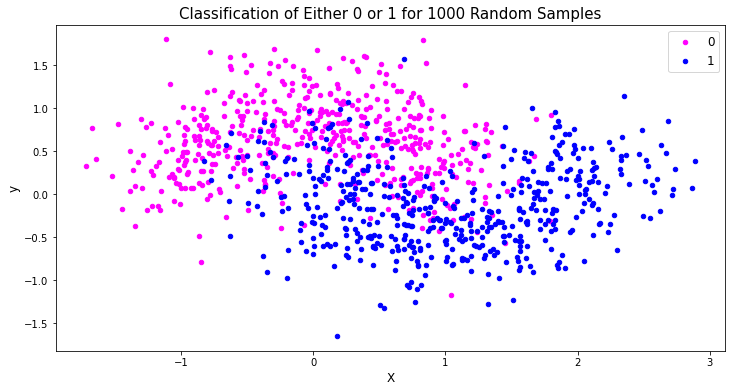

In [19]:
# create a dataframe from a dictionary with the key as the column names
# and the values as the column data
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# defining colors for each class
colors = {0:'magenta', 1:'blue' }
fig, ax = plt.subplots(figsize=(12, 6))
grouped = df.groupby('label')

# iterate over groups to format and label each point
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', title= "Random Samples"
    " of Class 0 and Class 1", label=key, color=colors[key])
ax.set_title("Classification of Either 0 or 1 for 1000 Random Samples", fontsize=15)
ax.set_xlabel('X', fontsize = 12)
ax.set_ylabel('y', fontsize = 12)
leg = ax.legend(fontsize = 12)
plt.show()

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

In [20]:
# 3 random models
sample1=df.sample(n=100, random_state=123) #dataset1
sample2=df.sample(n=100, random_state=456) #dataset2
sample3=df.sample(n=100, random_state=789) #dataset3

# k-values
k1=1
k2=25
k3=50

# defining models using the above k-values
model1 = KNeighborsClassifier(n_neighbors=k1)
model2 = KNeighborsClassifier(n_neighbors=k2)
model3 = KNeighborsClassifier(n_neighbors=k3)

#fit each model to each dataset- 3x3 model fits
features1=list(zip(sample1['x'],sample1['y']))
label1= list(sample1['label'])
model1.fit(features1,label1)
model2.fit(features1,label1)
model3.fit(features1,label1)

features2=list(zip(sample2['x'],sample2['y']))
label2= list(sample2['label'])
model1.fit(features2,label2)
model2.fit(features2,label2)
model3.fit(features2,label2)

features3=list(zip(sample3['x'],sample3['y']))
label3= list(sample3['label'])
model1.fit(features3,label3)
model2.fit(features3,label3)
model3.fit(features3,label3)

# storing models, their corresponding descriptions and the 3 datasets in arrays
classifiers= [model1,model2,model3]
desc=['kNN with k=1','kNN with k=25','kNN with k=50']
dataset= [sample1,sample2,sample3]

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

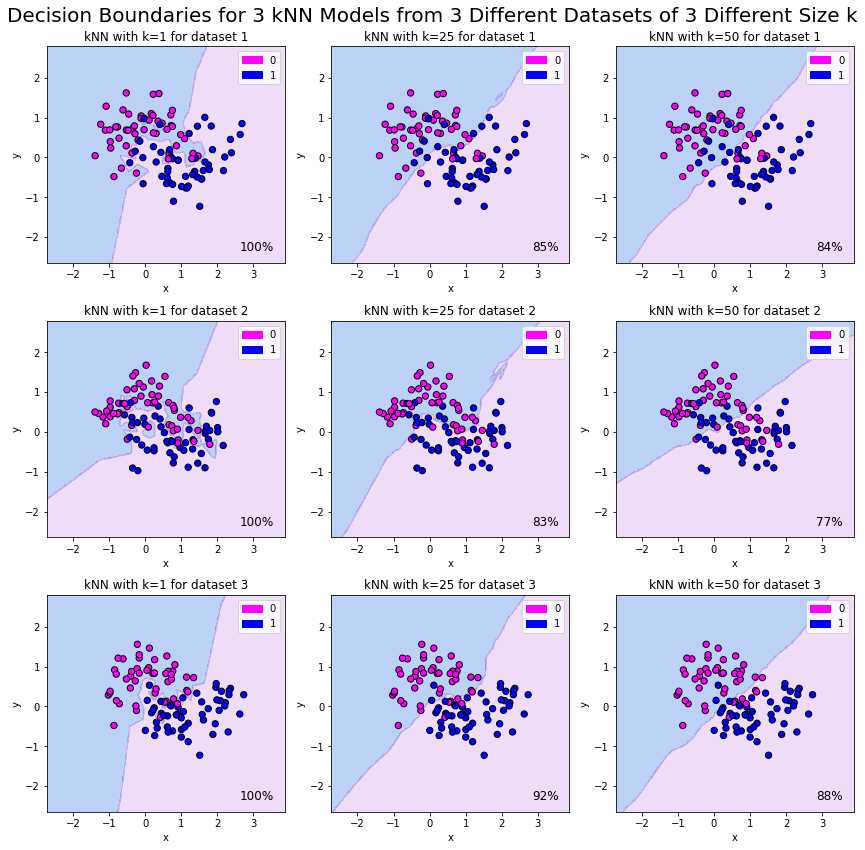

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
h=0.02

fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.suptitle("Decision Boundaries for 3 kNN Models from 3 Different Datasets"
" of 3 Different Size k", fontsize=20)

i = 1
plot_col=0
plot_row=0

# iterate over datasets
for count, ds in enumerate(dataset):
    
    features=list(zip(ds['x'],ds['y']))
    label= list(ds['label'])
    for des, clf in zip(desc, classifiers):
        
        
        clf.fit(features,label)
        score = (clf.score(features,label))*100
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.figure()
       
        # creating the background colors
        cmap_light = ListedColormap(['#558CE6', '#D8ABEB'])
        ax[plot_row,plot_col].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

        #creating the point colors
        colors = ['magenta','blue']
        ax[plot_row,plot_col].scatter(ds['x'],ds['y'],c=ds['label'],\
             cmap= ListedColormap(colors),edgecolor='black',s=40)

        # creating the labels and titles
        ax[plot_row,plot_col].set_title(des+" for dataset "+ str(count+1))
        ax[plot_row,plot_col].set_xlim(xx.min(), xx.max())
        ax[plot_row,plot_col].set_ylim(yy.min(), yy.max())
        ax[plot_row,plot_col].set_xlabel("x")
        ax[plot_row,plot_col].set_ylabel("y")

        #creating the legends
        label_pink = mpatches.Patch(color= "magenta", label="0", hatch="o")
        label_blue = mpatches.Patch(color="blue", label="1", hatch="o")
        ax[plot_row,plot_col].legend(handles=[label_pink,label_blue],loc='best')

        # plot the accuracy scores
        ax[plot_row,plot_col].text(xx.max() - .3, yy.min() + .3, ('%.0f' % score)
        .lstrip('0') + '%', size=12, horizontalalignment='right')
        
        # increment to the next dataset, row and column appropriately
        i += 1
        if plot_col==2:
            plot_col=0
        else:
            plot_col+=1
    plot_row+=1

      

fig.tight_layout()
plt.show()

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

In each plot, I added the accuracy score in the bottom right corner.  We can see that the left column of plots all have 100% accuracy.  This makes sense because $k$=1 for these plots, so every point is essentially classifying itself.  In the center column of plots, where $k$=25, the accuracy decreases slightly. Finally, in the plots in the right column, where $k$=100, the accuracy scores are the lowest. Between the rows, we can see the points are located in slighly different positions, but otherwise the samples are all relatively similar.

One could argue that the plots in the left column best separate the two classes, but this is only true for the training data.  As soon as we start to plot test data with those decision boundaries, we will find we have a high error rate.  So instead, the plots in the center where $k$=25 appears to best separate the two classes of data without overfitting to the training data.

When we look across columns, we can see the decision boundary for each dataset go from high variance on the left, to low variance on the right. For the plots in the center and right columns, the decision boundaries look relatively the same as the data change. The decision boundaries vary most with the plots in the left column, where none of the three boundaries look similar as the data change.

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

The left column of plots has the __highest variance__ in the decision boundary, which means it has the __lowest bias__. The implication of this is that we can overfit our model from increasing its flexibility.

The right column of plots has the __lowest variance__ in the decision boundary, which means it has the __highest bias__. The implication of this is that we can underfit our model from decreasing its flexibility.

The overarching challenge with supervised machine learning algorithms is trying to select a statistical learning method that simultaneously achieves low variance and low bias to minimize the expected test error rate.

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

In [22]:
# train data
X_train, y_train = raw_data

# test data
test_data = datasets.make_moons(n_samples=1000, noise=0.35)
X_test, y_test = test_data

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

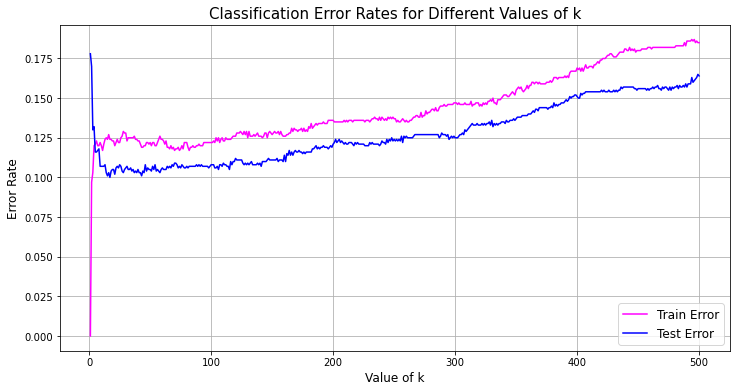

In [23]:
# generate a list of 500 k values
k = list(range(1,501))

# initialize empty lists
error_train = []
error_test = []

# iterate over k values and append the error rates to the lists
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    error_train.append((1-accuracy_score(y_train, y_hat_train)))
    y_hat_test = model.predict(X_test)
    error_test.append((1-accuracy_score(y_test, y_hat_test)))

# plot the error rates
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.grid()

ax.plot(k,error_train, c='magenta',label='Train Error')
ax.plot(k,error_test, c='blue',label='Test Error')
ax.set_xlabel('Value of k', fontsize = 12)
ax.set_ylabel('Error Rate', fontsize = 12)
leg = ax.legend(fontsize = 12)
ax.set_title('Classification Error Rates for Different Values of k', fontsize = 15)
plt.show()

**(c)** What trend do you see in the results?

In the plot, we can see our training error rate start at 0 when k=1 and quickly increase as k increases until it intersects with the test error.  Inversely, the test error rate starts much higher when k = 1, and quickly decreases until it intersects with the training error.  After the two different rates intersect, they both start to increase *gradually* as k increases.

**(d)** What values of $k$ represent high bias and which represent high variance?

- High bias occurs when k is large.
- High variance occurs when k is small.

**(e)** What is the optimal value of $k$ and why?

Even though the training error rate is lower than the test error rate when k is small, we should __*not*__ pick our optimal value of k based on the training error rate. The training data *should* have a lower error rate with small values of k because we have a highly flexible model in these cases. This naturally leads to a bad test error rate because we overfit to our training data. Therefore, the optimal value of k is where we have the lowest error rate __*in the test data*__.

In [24]:
optimal_k= k[error_test.index(min(error_test))]
print("The optimum value of k based on minimum test error rate is:", optimal_k)

The optimum value of k based on minimum test error rate is: 17


**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In KNN classifiers, the value of k is considered to be a *hyper-parameter* which is used to optimize the model performance by changing its flexibility. Flexibility increases the degrees of freedom available to the model to fit to the training data.

Here are a few examples of hyper-parameters that control model flexibility:
- nonlinear transformations in linear regression
- depth of tree in decision trees
- kernel and slack in support vector machines

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

In [25]:
path = '/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS'\
'/Assignments/CourseGitHub/assignments/data/'
train = pd.read_csv(path + 'A2_Q7_train.csv')
test = pd.read_csv(path + 'A2_Q7_test.csv')

x_train = train.x.values.reshape(-1,1)
y_train = train.y.values.reshape(-1,1)

x_test = test.x.values.reshape(-1,1)
y_test = test.y.values.reshape(-1,1)

In [26]:
# sort the training data for graphical purposes
y_train = y_train[x_train[:,0].argsort()]
x_train = x_train[x_train[:,0].argsort()]

**ANSWER**

**(a)** Create a scatter plot of your training data.

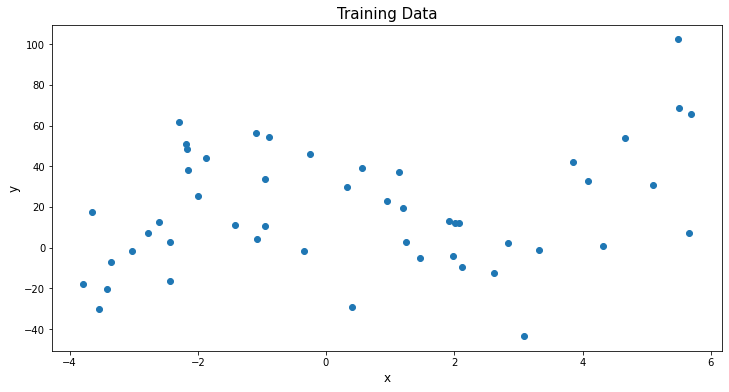

In [27]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
plt.scatter(x_train,y_train)
ax.set_xlabel("x", fontsize = 12)
ax.set_ylabel("y", fontsize = 12)
ax.set_title("Training Data", fontsize = 15)
plt.show()

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$), but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

In [28]:
# fit the model
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
# predict the traing data
y_hat = model_lr.predict(x_train)
# calculate the r-squared
r2 = r2_score(y_train, y_hat)
print("The r-squared value is {:0.3f}%.".format(r2*100))
# calculate the mean squared error
mse = mean_squared_error(y_train, y_hat)
print("The mean squared error is {:0.1f}.".format(mse))
# get the model coefficients
coef = model_lr.coef_[0][0]
print("The model estimated coefficient is {:0.2f}.".format(coef))
intercept = model_lr.intercept_[0]
print("The model intercept is {:0.2f}.".format(intercept))

The r-squared value is 6.486%.
The mean squared error is 791.4.
The model estimated coefficient is 2.59.
The model intercept is 17.20.


The equation representing the estimated linear regression model:

$y = 17.2 + 2.59 x_1$

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

In [29]:
# polynomial transformations of the training data
x_train_2 = x_train**2
x_train_3 = x_train**3
# combine all the training data in one matrix
x_train_transformed = np.concatenate((x_train,x_train_2,x_train_3),axis=1)

In [30]:
# fit the model
model_lr_2 = LinearRegression()
model_lr_2.fit(x_train_transformed,y_train)
# predict the traing data
y_hat_2 = model_lr_2.predict(x_train_transformed)
# calculate the r-squared
r2 = r2_score(y_train, y_hat_2)
print("The r-squared value is {:0.3f}%.".format(r2*100))
# calculate the mean squared error
mse = mean_squared_error(y_train, y_hat_2)
print("The mean squared error is {:0.1f}.".format(mse))
# get the model coefficients
coef = model_lr_2.coef_[0]
print("The model estimated coefficients are:")
for i in coef:
    print(i.round(2))
intercept = model_lr_2.intercept_[0]
print("The model intercept is {:0.2f}.".format(intercept))

The r-squared value is 39.634%.
The mean squared error is 510.9.
The model estimated coefficients are:
-9.25
-2.13
0.9
The model intercept is 24.16.


The equation representing the polynomial regression model:

$y = 24.16 - 9.25x_1 - 2.13x_2 + 0.9x_3$

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

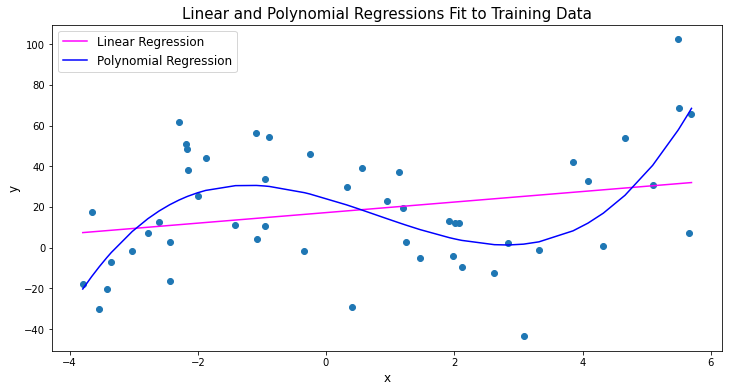

In [31]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
plt.scatter(x_train,y_train)
ax.set_xlabel("x", fontsize = 12)
ax.set_ylabel("y", fontsize = 12)
ax.set_title("Linear and Polynomial Regressions Fit to Training Data", fontsize = 15)

plt.plot(x_train,y_hat,c='magenta',label='Linear Regression')
plt.plot(x_train,y_hat_2,c='blue',label='Polynomial Regression')
plt.legend(fontsize = 12)
plt.show()

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

In [32]:
# sort the test data for graphical purposes later
y_test = y_test[x_test[:,0].argsort()]
x_test = x_test[x_test[:,0].argsort()]

In [33]:
# predict the test data
y_hat_linear = model_lr.predict(x_test)

# polynomial transformations of the test data
x_test_2 = x_test**2
x_test_3 = x_test**3
# combine all the test data in one matrix
x_test_transformed = np.concatenate((x_test,x_test_2,x_test_3),axis=1)

# predict the transformed test data
y_hat_transform = model_lr_2.predict(x_test_transformed)

In [34]:
# calculate the r-squared
r2 = r2_score(y_test, y_hat_linear)
mse = mean_squared_error(y_test, y_hat_linear)
print("Linear regression:\n  r-squared: {:0.2f}% | mse: {:0.1f}"
.format(r2*100, mse))

r2_2 = r2_score(y_test, y_hat_transform)
mse_2 = mean_squared_error(y_test, y_hat_transform)
print("Polynomial regression:\n   r-squared: {:0.2f}% | mse: {:0.1f}"
.format(r2_2*100, mse_2))

Linear regression:
  r-squared: -13.29% | mse: 1116.7
Polynomial regression:
   r-squared: 22.95% | mse: 759.5


**(f)** Which models perform better on the training data, and which on the test data? Why?

For the training data, the linear regression has a low $R^2$ value of 6.486%, whereas the polynomial regression has an $R^2$ of 39.634%.  This means that for the polynomial regression, almost 40% of the variation in y can be explained by x, and signifies a strong relationship between the two variables.  Therefore, __the polynomial regression performs better on the training data__, which can be supported by the fact that the polynomial regression has a smaller mean square error than the linear regression.

For the test data the linear regression has a negative $R^2$ which means the model does not follow the trend of the data, therefore leading to a worse fit than a horizontal line.  With the polynomial regression, we have a positive $R^2$ which means the model does follow the trend of the data, and almost 23% of the variation in y can be explained by x.  This tells us __the polynomial regression performs better on the test data as well__, which can be supported by the fact that the polynomial regression has a smaller mean square error than the linear regression.

All of this makes sense because the polynomial regression has been tailored to fit to the training data. The higher number of parameters in the polynomial regression make the model more flexible. The linear model has low flexibility which cannot capture the variance of unseen data.

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

In the previous question, it was not guaranteed that the polynomial regression would perform better on the test data.  I chose those polynomial terms to transform my data according to what I saw in the training data.  However, the test data does not necessarily have to follow these same trends.  To illustrate my point, I have included a plot below of the test data. We can see that there are fewer points in our test data (which is the convention when splitting data into train and test) and there are some outliers in the data that we didn't see in the training data (like the one right underneath the "P" in "Polynomial"). This is a minor example of what could happen with differing test data, but if these kinds of points were more abundant in our test data, the predictive capability of our model would decrease.  This of course leads to lower accuracy in our model's generalization performance.

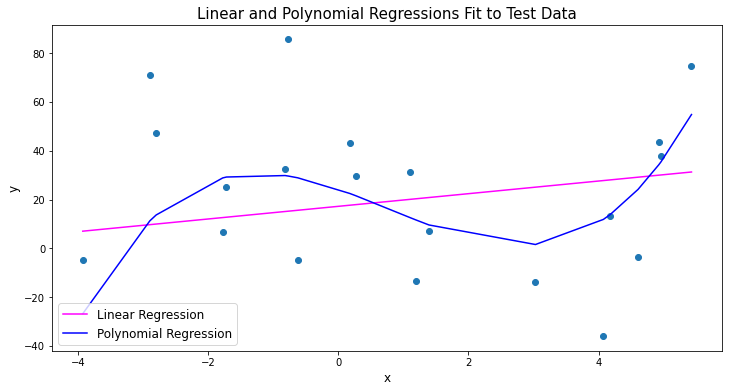

In [35]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
plt.scatter(x_test,y_test)
ax.set_xlabel("x", fontsize = 12)
ax.set_ylabel("y", fontsize = 12)
ax.set_title("Linear and Polynomial Regressions Fit to Test Data", fontsize = 15)

plt.plot(x_test,y_hat_linear,c='magenta',label='Linear Regression')
plt.plot(x_test,y_hat_transform,c='blue',label='Polynomial Regression')
plt.legend(fontsize = 12, loc='lower left')
plt.show()